# Assignment 2018 - Programming for Data Analysis

In this assignment i will explore the numpy.random library in python. This is a useful and extensive library for generating random numbers and distributions, as well as randomly selecting items from an array. This assignment is divided into four sections:

- I will explain the purpose of the **numpy.random** libary and its limitations.

- The **simple random data** and **permutations** sections of the package will be examined in detail, including the inclusion of code to demonstrate their use.

- I use the **Distributions** section of the libary to explore seven different distributions and explain their significance.

- Finally, i will examine the **Random Generator** section, focusing on the differences between the numpy.random.see and numpy.random.RandomState functions. 

Before i begin, the below cell imports the various packages that i will be using in this assignment. This cell should always be run before continuing through the notebook to ensure that subsequent code runs correctly. 

As well, as numpy, matplotlib is used to create plots and python's random and time modules will be used in the notebook. random are secrets are other python random mudules to generate random numbers. 
%matplotlib inline is a **magic function** in Ipython/Jupyter Notebook, which ensures that matplotlib plots display correctly. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import secrets
%matplotlib inline

# 1. numpy.random

The numpy.random library randomly generates instances or arrays of floats or integers in a given size or shape. The permutations functions randomly select items from a list.  

The library can also generate a multitude of distributions in a given size, from the uniform to zipf distribution. These will be explored in more detail later in the notebook. 

The random.seed and random.randomstate functions allow the user to seed all numpy.random functions. In simple terms, a seeded function will ensure that the particularly function gives the same result every time until the seed is changed. This is particularly useful for debugging code. 

I will now look at **intervals** and limitations of numpy.random. 

## Intervals

Before, i go one, it is important to point out a key difference between functions is their interval type.  

If you print the help file for the rand function, it states that it will print a random float or floats between 0 and 1, in the form \[0,1\)

The "\[" means that it includes 0, but the "\)" denotes that it does not include 1. This is called a half-open or half-closed interval.

Other intervals are as follows [1]:

- \(0,1\] is a half open interval which excludes 0 and includes 1.

- \(0,1\) is an open interval which excludes both 0 and 1.

- \[0,1\] is a closed interval which includes 0 and 1. 

random.random_integers is a closed interval, while random.randint is half-open in the form  \[0,1). It is important to be aware of this when choosing an appropriate function. 

[\[1\]](http://www-history.mcs.st-and.ac.uk/~john/analysis/Lectures/L22.html)


In [19]:
print(help(np.random.rand))

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

## Pseudorandom Number Generator 

numpy.random is a Pseudorandom Number Generator (PRNG) using the Mersenne Twister (MT) algorithm to generate random numbers [1]. PRNG numbers are generated using mathematical formulas and are sufficently random for most purposes. However, PRNG numbers are pre-determined and not truly random. The MT homepage recommends against using it for cryptography, "... since from sufficiently long subsequence of the outputs, one can predict the rest of the outputs." [2].

True Random Number Generators use physical phenomena, such as radio static, to generate truly random numbers. Dr. Mads Haahr explains the difference between PRNG and TRNG as follows: 

>  PRNGs generate random numbers by using mathematical formulae or precalculated lists, using one corresponds to someone rolling a die many times and writing down the results. Whenever you ask for a die roll, you get the next on the list. Effectively, the numbers appear random, but they are really predetermined. TRNGs work by getting a computer to actually roll the die — or, more commonly, use some other physical phenomenon that is easier to connect to a computer than a die is [3].


Random numbers generated with numpy.random are acceptable for data analysis and most uses, however would not be acceptable for critical use, like cryptography. 

A Cryptographically secure pseudorandom number generator (CSPRNG) is available in python using the **secrets** module [4]. The code in the next cell generates a random number between 0 and 100. As you can see it is a half-open interval.

[\[1\]](https://www.packtpub.com/mapt/book/big_data_and_business_intelligence/9781785285110/2/ch02lvl1sec16/numpy-random-numbers)
[\[2\]](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/efaq.html)
[\[3\]](https://www.random.org/randomness/)
[\[4\]](https://docs.python.org/3/library/secrets.html)


In [18]:
print(secrets.randbelow(101))

48


## 2. Simple Random Data

random.rand gives floats from a uniform distribution and random.randn gives floats from a uniform distribution. The below code prints two random numbers from each function.

In [22]:
print(np.random.rand(2))
print(np.random.randn(2))

[0.96697185 0.05150723]
[-0.46175244 -0.58121838]


A histogram generated with both functions will explain the differences more clearly. 

random.rand gives a random float or floats from a uniform distribution between 0 and 1. The below histogram shows 1000 random numbers generated with this function. All numbers have an equal chance of being generated; all blue bins are of relative equal height. The mean of a uniform distribution between 0 and 1 will be approximately 0.5, as demonstrated below in the next cell.

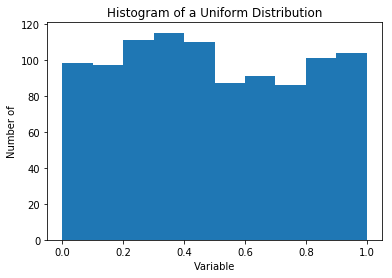

In [23]:
r = np.random.rand(1000)
plt.hist(r)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a Uniform Distribution")
plt.show()

In [24]:
np.mean(r)

0.4924219372877823

random.randn gives a random float or floats from a normal distribution with a mean of 0 and a variance of 1. The below histogram shows 1000 random numbers generated with this function. The mean and medium will be similar as demonstrated in the next cell. 

In a normal distributions most values are clustered around the mean, meaning that these values are more likely to be generated. Values further from the mean are less likely to be generated. 

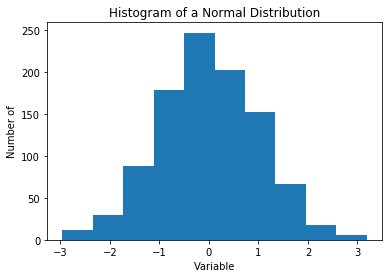

In [26]:
rn = np.random.randn(1000)
plt.hist(rn)
plt.ylabel('Number of')
plt.xlabel('Variable')
plt.title("Histogram of a Normal Distribution")
plt.show()

In [27]:

print("The mean is ", np.mean(rn))
print("The median is ", np.median(rn))

The mean is  0.006147471814270194
The median is  -0.016169852910740693


## Random Integer

np.random.randint produces a random integer (real number) from a uniform distribution (all numbers are equally likely to be picked). The other function np.random.random_integers produces a similar result but is deprecated. 

The below game uses randint to pick a random real number between 1 and 100. 

In [28]:
while True: # This code ensures that the user inputs Hard or Easy. Cite: https://stackoverflow.com/questions/29200952/how-to-only-allow-some-inputs-python
    ans = input("Guess a number between 1 and 100. Type Hard or Easy in the box")
    ans = ans.title() # The user can enter uppercase or lowercase and it will still be accepted.
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break # If they do choose correctly, the while loop breaks and goes to the next code.
        
        
if ans == "Hard": # If they choose Hard, they get 5 trys; easy gives them 10.
    ans = 5
else:
    ans = 10
    


num = np.random.randint(1,100) # The random number is generated

for x in range(ans): # For loop gives them a certain amount of tries - based on their "hard" or "easy" input earlier.
    guess = int(input("Guess a number between 1 and 100. You have " + str(ans) + " trys." ))
    
    if guess < num:
        print("Too low") # A warning is printed if they are too high or too low
    
    elif guess > num:
        print("Too high")
        
    else:
        break
        
if guess == num:
    
    print("You guessed right!")

else:
    print("Sorry, the number is " + str(num))

    
  
    

    

    
    

Guess a number between 1 and 100. Type Hard or Easy in the boxeasy
Guess a number between 1 and 100. You have 10 trys.50
Too high
Guess a number between 1 and 100. You have 10 trys.25
Too high
Guess a number between 1 and 100. You have 10 trys.15
Too high
Guess a number between 1 and 100. You have 10 trys.10
Too low
Guess a number between 1 and 100. You have 10 trys.12
Too low
Guess a number between 1 and 100. You have 10 trys.14
You guessed right!


###### The next ones are all the same https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions

## Choices

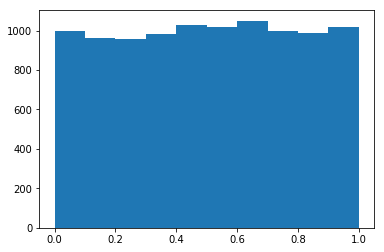

In [5]:
x = np.random.rand(10000)

plt.hist(x)
plt.show()

In [8]:
while True:
    ans = input("Guess a number between 1 and 100. Type Hard or Easy in the box")
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break
        
        
if ans == "Hard":
    ans = 5
else:
    ans = 10
    


num = np.random.randint(1,100)

for x in range(ans):
    guess = int(input("Guess a number between 1 and 100. You have " + str(ans) + " trys." ))
    
    if guess < num:
        print("Too low")
    
    elif guess > num:
        print("Too high")
        
    else:
        break
        
if guess == num:
    
    print("You guessed right!")

else:
    print("Sorry, the number is " + str(num))

    
  
    

    

    
    

Guess a number between 1 and 100. Type Hard or Easy in the boxHard
Guess a number between 1 and 100. You have 5 trys.3
Too low
Guess a number between 1 and 100. You have 5 trys.4
Too low
Guess a number between 1 and 100. You have 5 trys.1
Too low
Guess a number between 1 and 100. You have 5 trys.5
Too low
Guess a number between 1 and 100. You have 5 trys.6
Too low
The number is 36


In [17]:
num = np.random.randint(1,100)
print(num)

64


In [ ]:
y = np.random.rand(10000)
samples = []
for x in range(1000):
    samples.append(np.mean(random.choices(y, k=50)))

    
    
plt.hist(samples)
plt.show()


    




In [ ]:
## Gives a random distribution

y = np.random.randn(10000)

plt.hist(y)
plt.show()

In [ ]:
print(np.random.bytes(2))

In [8]:
def unScramble():
    animals = ["cat","dog","fish","sheep", "chicken", "elephant", "giraffe", "gazelle", "lion", "tiger", "rabbit" ]
    global x
    x = np.random.choice(animals)

    jumble = []
    for i in x:
        jumble.append(i)


    y = print(np.random.permutation(jumble))
    return(y)


    








In [9]:
while True: 
    ans = input("Unscramble. Type Hard or Easy in the box")
    ans = ans.title()
    if ans not in ('Hard', "Easy"):
        print("Type Easy or Hard.")
    else:
        break 
               
if ans == "Hard": 
    ans = 5
else:
    ans = 10

unScramble()

countdown_start = time.time() # https://stackoverflow.com/questions/13293269/how-would-i-stop-a-while-loop-after-n-amount-of-time
while time.time() < countdown_start + int(ans):
    
    answer = input("You have " + str(ans) + " seconds. Unscramble and enter the animal here ")
    answer = answer.lower()
    
    
    if answer == x and time.time() <= countdown_start + int(ans):
        print("you guessed right!")
        break
        
    elif answer != x and time.time() <= countdown_start + int(ans):
        print("Try again")
    
    elif answer != x and time.time() > countdown_start + int(ans):
        print("Out of time! The animal is a " + x)
    
    elif answer == x and time.time() > countdown_start + int(ans):
        print("Too late!")
              







        

Unscramble. Type Hard or Easy in the boxHard
['f' 's' 'i' 'h']
You have 5 seconds. Unscramble and enter the animal here Fish
you guessed right!


In [8]:
rs = np.random.RandomState(5)
numList = rs.randint(100, size=5)
numList = sorted(numList)
seq = list(np.random.permutation(numList))


print(seq)

guess = input("order the numbers")
numbers = list(map(int, guess.split())) # https://stackoverflow.com/questions/4663306/get-a-list-of-numbers-as-input-from-the-user



if numbers == numList:
    print("Good Job")
    
        
elif numbers != numList:
    print("Sorry, wrong answer!")
    

[16, 73, 61, 99, 78]
order the numbers16 61 73 78 99
Good Job


Random seed changes the global seed for numpy.random

In [26]:
np.random.seed(1)
print(np.random.rand(5))
print(np.random.randint(10, size=5))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0 1 7 6 9]


In [27]:
np.random.seed(1)
print(np.random.rand(5))
print(np.random.randint(10, size=5))

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0 1 7 6 9]
